### 1- Applying the decision tree on Titanic dataset

In [23]:
import pandas as pd
tp_data=pd.read_csv('tp_data.csv')
tp_data.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,0,2,1,28.0,0,0,13.0000,2,Mrs
1,1,0,3,1,25.0,0,0,7.6500,2,Mrs
2,2,0,3,1,20.0,0,0,7.8542,2,Mrs
3,3,0,3,0,29.0,0,4,21.0750,2,Mrss
4,4,0,1,1,31.0,1,0,52.0000,2,Mrs


In [24]:
tp_data.drop(['Unnamed: 0'],axis=1,inplace=True)
# encoding the title column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()  
tp_data['title']=encoder.fit_transform(tp_data['title'])
tp_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,2,1,28.0,0,0,13.0000,2,2
1,0,3,1,25.0,0,0,7.6500,2,2
2,0,3,1,20.0,0,0,7.8542,2,2
3,0,3,0,29.0,0,4,21.0750,2,3
4,0,1,1,31.0,1,0,52.0000,2,2


In [46]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x=tp_data.drop('Survived',axis=1)
y=tp_data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
classifier= tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=5)  
classifier.fit(x_train, y_train)   #fitting our model
y_pred=classifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


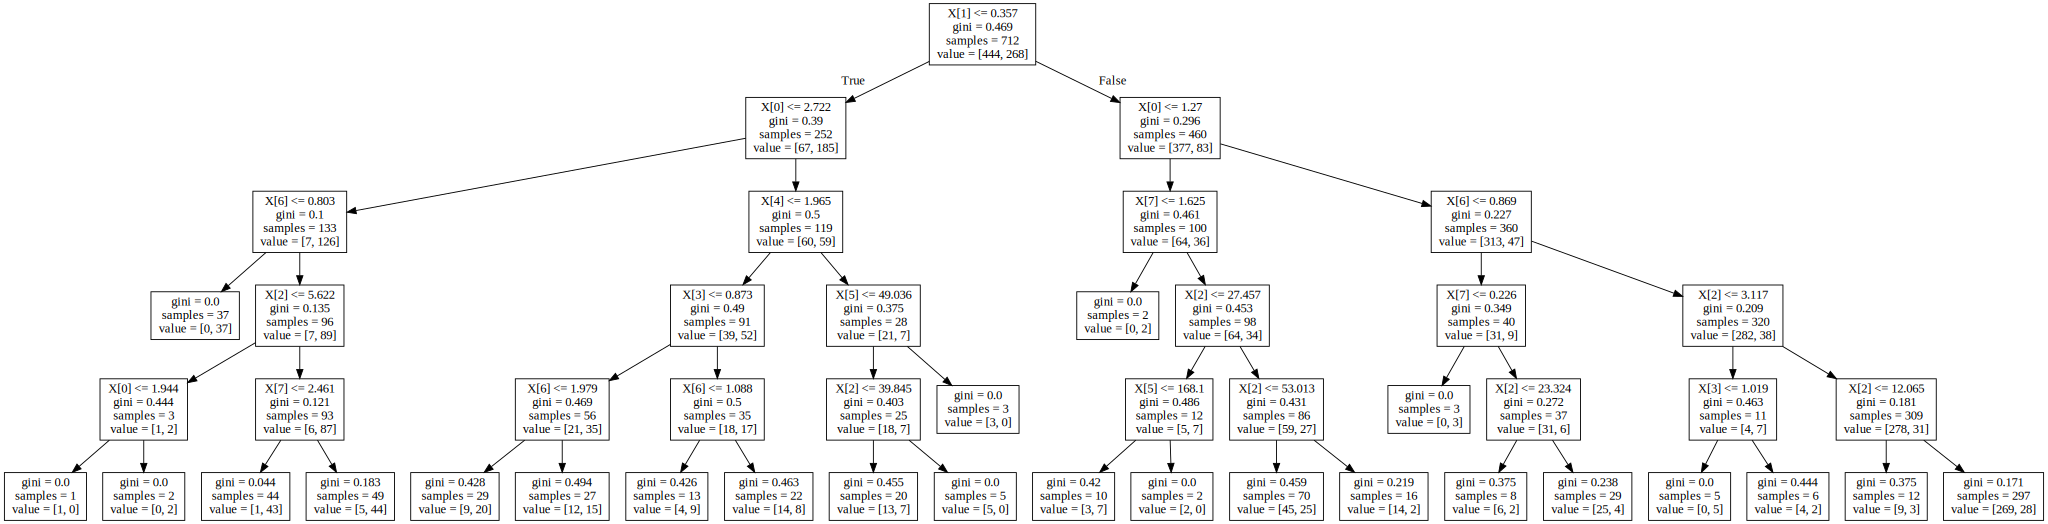

In [41]:
import graphviz
dot_data=tree.export_graphviz(classifier,out_file=None)
graph=graphviz.Source(dot_data)
graph.render('tp_data')
graph

In [33]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
590,3,1,30.0,1,0,24.1500,1,2
131,3,0,22.0,0,0,7.7500,1,1
628,3,1,30.0,0,0,56.4958,2,2
195,3,1,32.0,1,0,15.8500,2,2
230,3,0,30.0,1,0,14.4583,0,3


In [43]:
# Determining the prediction manually : 
# For the individual who has the characteristics of row 590 in the dataframe x_test above  , the prediction is 'Survived'.

In [75]:
# changing the parameters of the tree classifier :
classifier= tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=5,max_leaf_nodes=10,min_samples_leaf=10)  
classifier.fit(x_train, y_train)   #fitting our model
y_pred=classifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8491620111731844


In [76]:
# When we included the pruning parameters , the accuracy of the tree classifier has improved : from 80.4% to 84.9% .
# This is expected , because the pruning parameters are set in order to prevent the tree from being too complex thus 
# avoids overfitting and as a result , increases the accuracy of the classifier . 

### 2- Applying the random forest on Titanic Dataset

In [60]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
x=tp_data.drop('Survived',axis=1)
y=tp_data['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20,random_state=10)
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8100558659217877


In [50]:
# The random forest has given a better accuracy than the individual tree decision

In [52]:
# decreasing the number of estimators
clf=RandomForestClassifier(n_estimators=5) 
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458


In [59]:
# increasing the number of estimators 
clf=RandomForestClassifier(n_estimators=25) 
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8324022346368715


In [61]:
# decreasing the number of estimators has decreased the accuracy however increasing the number of estimators has 
# increased the accuracy . 

In [62]:
# Let's determine the optimal number of estimators 

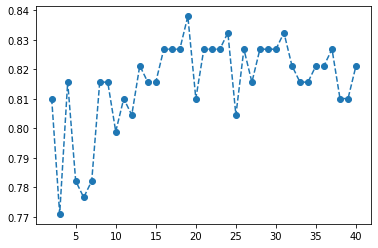

In [70]:
import matplotlib.pyplot as plt
scores=[]
for i in range(2,41):
    clf=RandomForestClassifier(n_estimators=i) 
    clf.fit(x_train, y_train) 
    y_pred=clf.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(2,41),scores,linestyle='dashed', marker='o')
    

In [72]:
# The optimal number of estimators is 19 ( for which the accuracy of the random forest is the best)